In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
 
%matplotlib inline

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau

In [3]:
train_data = pd.read_csv("/content/sample_data/Hackathon/train_s3TEQDk.csv")
train_data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
test_data = pd.read_csv("/content/sample_data/Hackathon/test_mSzZ8RL.csv")
test_data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [5]:
train_data.describe() 

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [6]:
train_data.Is_Lead.unique()

array([0, 1])

In [7]:
train_data.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [8]:
for col in ['Gender','Region_Code','Occupation','Channel_Code','Vintage','Credit_Product']:
  print(col, train_data[col].unique(),train_data[col].nunique())

Gender ['Female' 'Male'] 2
Region_Code ['RG268' 'RG277' 'RG270' 'RG282' 'RG261' 'RG265' 'RG283' 'RG254' 'RG269'
 'RG257' 'RG279' 'RG280' 'RG252' 'RG284' 'RG259' 'RG281' 'RG258' 'RG266'
 'RG260' 'RG274' 'RG256' 'RG275' 'RG273' 'RG267' 'RG272' 'RG251' 'RG262'
 'RG264' 'RG278' 'RG276' 'RG263' 'RG250' 'RG255' 'RG253' 'RG271'] 35
Occupation ['Other' 'Salaried' 'Self_Employed' 'Entrepreneur'] 4
Channel_Code ['X3' 'X1' 'X2' 'X4'] 4
Vintage [ 43  32  26  19  33  20  13  38  49 123  14  31  57  69  97  15  63  21
  99  56  87  62  55 103 104  93  61  91  27  39  50  45  25 117  80  81
  73  67 109  92 122  75  79 121 111 116  85 115  86  37  74 110  44   9
  68  51  98 105 127 129 133   8   7 128 135 134] 66
Credit_Product ['No' nan 'Yes'] 2


In [9]:
#df[df.isna().any(axis=1)].shape
train_data.columns[train_data.isnull().any()],test_data.columns[test_data.isnull().any()]

(Index(['Credit_Product'], dtype='object'),
 Index(['Credit_Product'], dtype='object'))

In [10]:
train_data['Credit_Product'].fillna(train_data['Credit_Product'].mode()[0], inplace =True)
test_data['Credit_Product'].fillna(test_data['Credit_Product'].mode()[0], inplace =True)
train_data.columns[train_data.isnull().any()],test_data.columns[test_data.isnull().any()]

(Index([], dtype='object'), Index([], dtype='object'))

In [11]:
categorical_columns = train_data.select_dtypes(exclude=["number"]).columns.drop('ID')
categorical_columns

Index(['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product',
       'Is_Active'],
      dtype='object')

In [12]:
train_data.set_index('ID',inplace=True)
test_data.set_index('ID',inplace=True)
#train_data.drop('ID',axis=1,inplace=True)
#test_data.drop('ID',axis=1,inplace=True)


In [13]:
Y_train = train_data[['Is_Lead']]
X_train = train_data.drop('Is_Lead', axis='columns')
X_test = test_data.copy()

X_train.head(),Y_train.head(), X_test.head()


(          Gender  Age Region_Code  ... Credit_Product Avg_Account_Balance  Is_Active
 ID                                 ...                                              
 NNVBBKZB  Female   73       RG268  ...             No             1045696         No
 IDD62UNG  Female   30       RG277  ...             No              581988         No
 HD3DSEMC  Female   56       RG268  ...             No             1484315        Yes
 BF3NC7KV    Male   34       RG270  ...             No              470454         No
 TEASRWXV  Female   30       RG282  ...             No              886787         No
 
 [5 rows x 9 columns],           Is_Lead
 ID               
 NNVBBKZB        0
 IDD62UNG        0
 HD3DSEMC        0
 BF3NC7KV        0
 TEASRWXV        0,           Gender  Age Region_Code  ... Credit_Product Avg_Account_Balance  Is_Active
 ID                                 ...                                              
 VBENBARO    Male   29       RG254  ...            Yes              7

In [14]:
X_train.shape,Y_train.shape, X_test.shape

((245725, 9), (245725, 1), (105312, 9))

In [15]:
numerical_columns = X_train.select_dtypes(include=["number"]).columns
X_train_num = X_train[numerical_columns]
X_test_num = X_test[numerical_columns]
X_train_cat = X_train[categorical_columns]
X_test_cat = X_test[categorical_columns]
numerical_columns, categorical_columns


(Index(['Age', 'Vintage', 'Avg_Account_Balance'], dtype='object'),
 Index(['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product',
        'Is_Active'],
       dtype='object'))

In [ ]:
# Outlier detection 
from collections import Counter

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(X_train_num,2,X_train_num.columns.tolist())
Outliers_to_drop

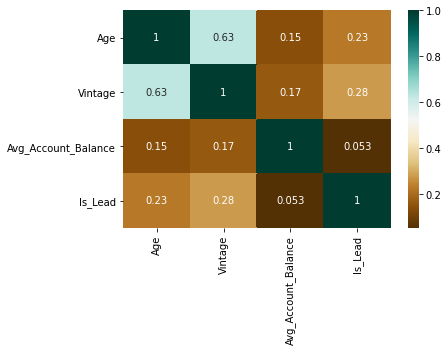

In [26]:
import seaborn as sns
train_num = pd.concat([X_train_num,Y_train],axis=1)
g = sns.heatmap(train_num.corr(),cmap="BrBG",annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


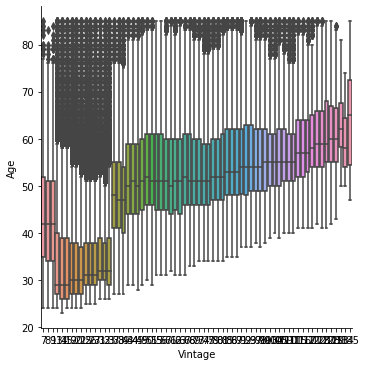

In [19]:
g = sns.factorplot(y="Age",x="Vintage",data=X_train_num,kind="box")
#g = sns.factorplot(y="Age",x="Sex",hue="Pclass", data=dataset,kind="box")
#g = sns.factorplot(y="Age",x="Avg_Account_Balance",data=X_train_num,kind="box")
#g = sns.factorplot(y="Age",x="Is_Lead", data=pd.concat([X_train_num,Y_train]),kind="box")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


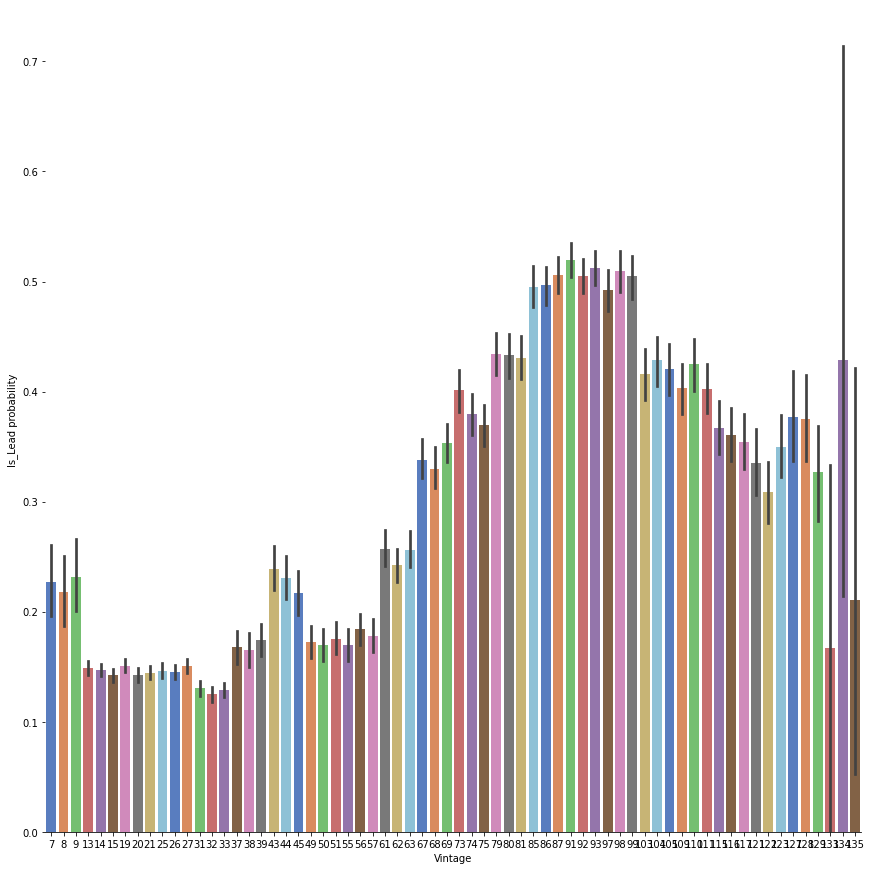

In [30]:
# Explore Vintage feature vs Is_Lead
g = sns.factorplot(x="Vintage",y="Is_Lead",data=train_num,kind="bar", size = 12 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Is_Lead probability")

In [ ]:
# Explore Avg_Account_Balance feature vs Is_Lead
g = sns.factorplot(x="Avg_Account_Balance",y="Is_Lead",data=train_num,kind="bar", size = 12 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Is_Lead probability")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


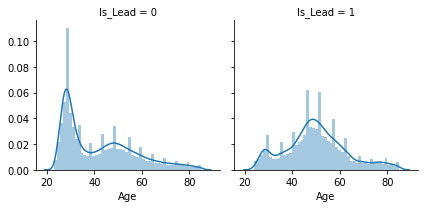

In [32]:
# Explore Age vs Is-Lead
g = sns.FacetGrid(train_num, col='Is_Lead')
g = g.map(sns.distplot, "Age")

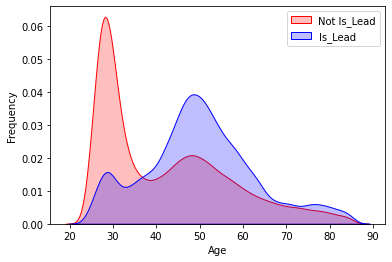

In [33]:
# Explore Age distibution 
g = sns.kdeplot(train_num["Age"][(train_num["Is_Lead"] == 0) & (train_num["Age"].notnull())], color="Red", shade = True)
g = sns.kdeplot(train_num["Age"][(train_num["Is_Lead"] == 1) & (train_num["Age"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Is_Lead","Is_Lead"])

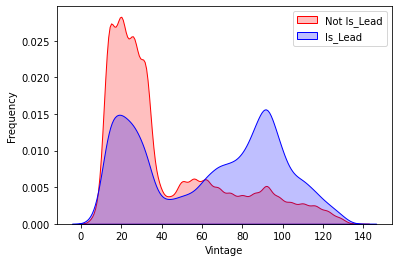

In [38]:
# Explore Vintage distibution 
feature = 'Vintage'
target = 'Is_Lead'
g = sns.kdeplot(train_data[feature][(train_data[target] == 0) & (train_data[feature].notnull())], color="Red", shade = True)
g = sns.kdeplot(train_data[feature][(train_data[target] == 1) & (train_data[feature].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel(feature)
g.set_ylabel("Frequency")
g = g.legend(["Not {0}".format(target),target])

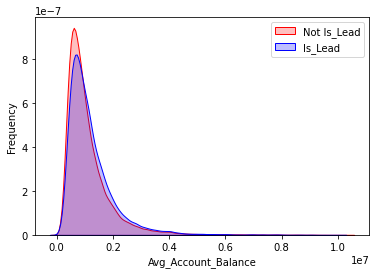

In [39]:
# Explore Avg_Acnt_Balance distibution 
feature = 'Avg_Account_Balance'
target = 'Is_Lead'
g = sns.kdeplot(train_data[feature][(train_data[target] == 0) & (train_data[feature].notnull())], color="Red", shade = True)
g = sns.kdeplot(train_data[feature][(train_data[target] == 1) & (train_data[feature].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel(feature)
g.set_ylabel("Frequency")
g = g.legend(["Not {0}".format(target),target])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


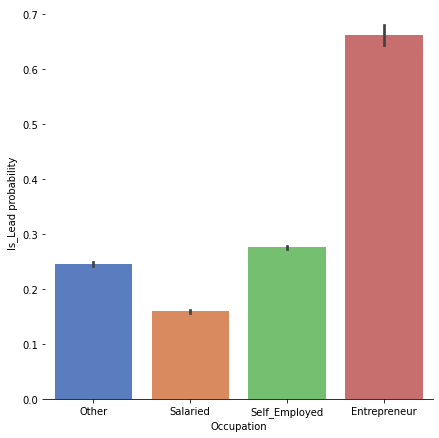

In [41]:
# Explore Occupation vs Is_Lead 
feature = 'Occupation'
target = 'Is_Lead'
g = sns.factorplot(x=feature, y=target,  data=train_data,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("{0} probability".format(target))

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


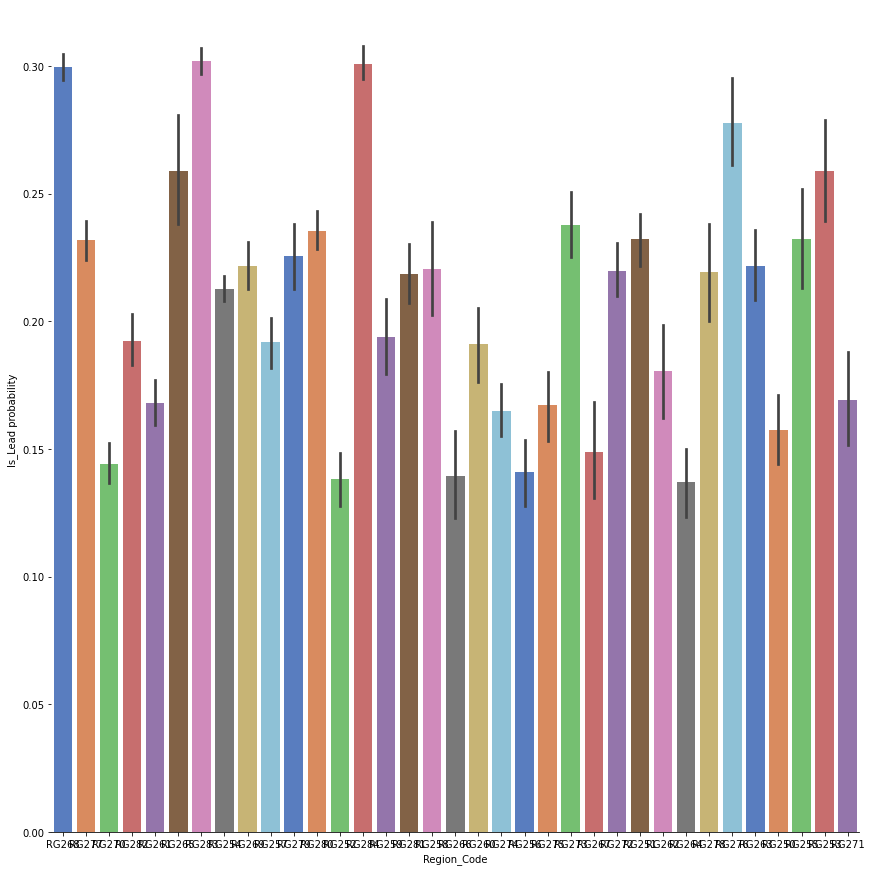

In [43]:
# Explore Region_Code vs Is_Lead 
feature = 'Region_Code'
target = 'Is_Lead'
g = sns.factorplot(x=feature, y=target,  data=train_data,
                   size=12, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("{0} probability".format(target))

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


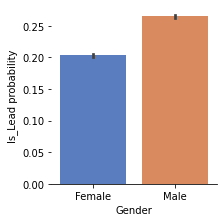

In [45]:
# Explore Gender vs Is_Lead 
feature = 'Gender'
target = 'Is_Lead'
g = sns.factorplot(x=feature, y=target,  data=train_data,
                   size=3, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("{0} probability".format(target))

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


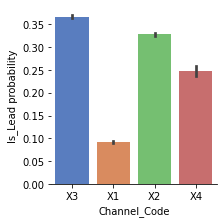

In [46]:
# Explore Channel_Code vs Is_Lead 
feature = 'Channel_Code'
target = 'Is_Lead'
g = sns.factorplot(x=feature, y=target,  data=train_data,
                   size=3, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("{0} probability".format(target))

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr

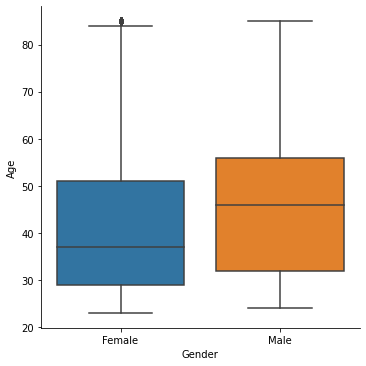

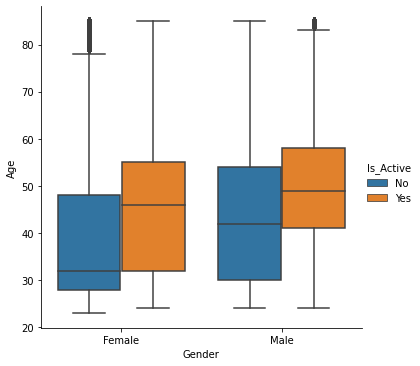

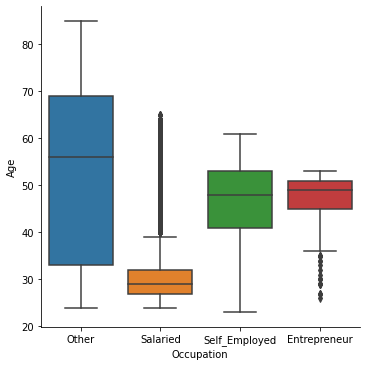

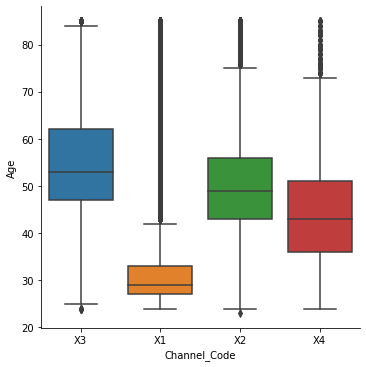

In [51]:
# Explore Age vs Sex, Parch , Pclass and SibSP
g = sns.factorplot(y="Age",x="Gender",data=train_data,kind="box")
g = sns.factorplot(y="Age",x="Gender",hue="Is_Active", data=train_data,kind="box")
g = sns.factorplot(y="Age",x="Occupation", data=train_data,kind="box")
g = sns.factorplot(y="Age",x="Channel_Code", data=train_data,kind="box")

In [93]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder

def data_prepare(data, label_encode_cols = [], onehot_encode_cols = [], ordinal_encode_cols = []):
  
  #Label Encode
  for col in label_encode_cols:
    oe = LabelEncoder()
    oe.fit(data[col])
    data[col] = oe.transform(data[col]) 

  #Ordinal Encode
  for col in ordinal_encode_cols:
    oe = OrdinalEncoder()
    oe.fit(data[col])
    data[col] = oe.transform(data[col]) 
    
  #OneHotEncode
  # Create categorical values for features
  for col in onehot_encode_cols:  
 #   data[col] = data[col].astype("category")
    data = pd.get_dummies(data, columns = onehot_encode_cols,prefix=col[:2])

  return data

dataset = data_prepare(data = train_data, label_encode_cols = ['Gender','Credit_Product','Is_Active'], 
                       onehot_encode_cols = ['Occupation'], ordinal_encode_cols = [])

#dataset['Region_Code'].astype("category")
dataset = pd.get_dummies(dataset, columns = ['Region_Code'],prefix="Rg_Cd")
#dataset['Channel_Code'].astype("category")
dataset = pd.get_dummies(dataset, columns = ['Channel_Code'],prefix="Ch_Cd")


dataset.head()
  

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Oc_Entrepreneur,Oc_Other,Oc_Salaried,Oc_Self_Employed,Rg_Cd_RG250,Rg_Cd_RG251,Rg_Cd_RG252,Rg_Cd_RG253,Rg_Cd_RG254,Rg_Cd_RG255,Rg_Cd_RG256,Rg_Cd_RG257,Rg_Cd_RG258,Rg_Cd_RG259,Rg_Cd_RG260,Rg_Cd_RG261,Rg_Cd_RG262,Rg_Cd_RG263,Rg_Cd_RG264,Rg_Cd_RG265,Rg_Cd_RG266,Rg_Cd_RG267,Rg_Cd_RG268,Rg_Cd_RG269,Rg_Cd_RG270,Rg_Cd_RG271,Rg_Cd_RG272,Rg_Cd_RG273,Rg_Cd_RG274,Rg_Cd_RG275,Rg_Cd_RG276,Rg_Cd_RG277,Rg_Cd_RG278,Rg_Cd_RG279,Rg_Cd_RG280,Rg_Cd_RG281,Rg_Cd_RG282,Rg_Cd_RG283,Rg_Cd_RG284,Ch_Cd_X1,Ch_Cd_X2,Ch_Cd_X3,Ch_Cd_X4
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NNVBBKZB,0,73,43,0,1045696,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
IDD62UNG,0,30,32,0,581988,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
HD3DSEMC,0,56,26,0,1484315,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
BF3NC7KV,1,34,19,0,470454,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
TEASRWXV,0,30,33,0,886787,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [94]:
Y_train = dataset[['Is_Lead']]
X_train = dataset.drop('Is_Lead', axis='columns')
X_test = test_data.copy()

X_train.head(),Y_train.head(), X_test.head()

(          Gender  Age  Vintage  ...  Ch_Cd_X2  Ch_Cd_X3  Ch_Cd_X4
 ID                              ...                              
 NNVBBKZB       0   73       43  ...         0         1         0
 IDD62UNG       0   30       32  ...         0         0         0
 HD3DSEMC       0   56       26  ...         0         1         0
 BF3NC7KV       1   34       19  ...         0         0         0
 TEASRWXV       0   30       33  ...         0         0         0
 
 [5 rows x 49 columns],           Is_Lead
 ID               
 NNVBBKZB        0
 IDD62UNG        0
 HD3DSEMC        0
 BF3NC7KV        0
 TEASRWXV        0,           Gender  Age Region_Code  ... Credit_Product Avg_Account_Balance  Is_Active
 ID                                 ...                                              
 VBENBARO    Male   29       RG254  ...            Yes              742366         No
 CCMEWNKY    Male   43       RG268  ...             No              925537         No
 VK3KGA9M    Male   31       

In [95]:
X_train_copy =  X_train.copy()
X_test_copy =  X_test.copy()

In [96]:
X_train =  X_train_copy.copy()
X_test =  X_test_copy.copy()

In [97]:
scaler = MinMaxScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_train

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Oc_Entrepreneur,Oc_Other,Oc_Salaried,Oc_Self_Employed,Rg_Cd_RG250,Rg_Cd_RG251,Rg_Cd_RG252,Rg_Cd_RG253,Rg_Cd_RG254,Rg_Cd_RG255,Rg_Cd_RG256,Rg_Cd_RG257,Rg_Cd_RG258,Rg_Cd_RG259,Rg_Cd_RG260,Rg_Cd_RG261,Rg_Cd_RG262,Rg_Cd_RG263,Rg_Cd_RG264,Rg_Cd_RG265,Rg_Cd_RG266,Rg_Cd_RG267,Rg_Cd_RG268,Rg_Cd_RG269,Rg_Cd_RG270,Rg_Cd_RG271,Rg_Cd_RG272,Rg_Cd_RG273,Rg_Cd_RG274,Rg_Cd_RG275,Rg_Cd_RG276,Rg_Cd_RG277,Rg_Cd_RG278,Rg_Cd_RG279,Rg_Cd_RG280,Rg_Cd_RG281,Rg_Cd_RG282,Rg_Cd_RG283,Rg_Cd_RG284,Ch_Cd_X1,Ch_Cd_X2,Ch_Cd_X3,Ch_Cd_X4
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NNVBBKZB,0,0.806452,0.281250,0,0.099205,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
IDD62UNG,0,0.112903,0.195312,0,0.054321,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
HD3DSEMC,0,0.532258,0.148438,0,0.141660,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
BF3NC7KV,1,0.177419,0.093750,0,0.043525,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
TEASRWXV,0,0.112903,0.203125,0,0.083823,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BPAWWXZN,1,0.451613,0.796875,0,0.184373,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
HFNB7JY8,1,0.064516,0.062500,0,0.081516,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
GEHAUCWT,0,0.048387,0.046875,0,0.062903,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [98]:
X_train.describe()

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Oc_Entrepreneur,Oc_Other,Oc_Salaried,Oc_Self_Employed,Rg_Cd_RG250,Rg_Cd_RG251,Rg_Cd_RG252,Rg_Cd_RG253,Rg_Cd_RG254,Rg_Cd_RG255,Rg_Cd_RG256,Rg_Cd_RG257,Rg_Cd_RG258,Rg_Cd_RG259,Rg_Cd_RG260,Rg_Cd_RG261,Rg_Cd_RG262,Rg_Cd_RG263,Rg_Cd_RG264,Rg_Cd_RG265,Rg_Cd_RG266,Rg_Cd_RG267,Rg_Cd_RG268,Rg_Cd_RG269,Rg_Cd_RG270,Rg_Cd_RG271,Rg_Cd_RG272,Rg_Cd_RG273,Rg_Cd_RG274,Rg_Cd_RG275,Rg_Cd_RG276,Rg_Cd_RG277,Rg_Cd_RG278,Rg_Cd_RG279,Rg_Cd_RG280,Rg_Cd_RG281,Rg_Cd_RG282,Rg_Cd_RG283,Rg_Cd_RG284,Ch_Cd_X1,Ch_Cd_X2,Ch_Cd_X3,Ch_Cd_X4
count,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000
mean,0.546127,0.336392,0.312181,0.293185,0.107210,0.388381,0.010854,0.285575,0.293006,0.410565,0.010158,0.024214,0.017442,0.007561,0.109228,0.008212,0.011586,0.024829,0.007940,0.010524,0.012656,0.031063,0.007276,0.015005,0.011366,0.006292,0.006422,0.006092,0.146237,0.031999,0.031417,0.006275,0.021373,0.018301,0.021512,0.013206,0.011248,0.052197,0.007415,0.016181,0.051989,0.020726,0.023722,0.119711,0.078624,0.422090,0.275617,0.279630,0.022664
std,0.497869,0.239172,0.252759,0.455224,0.082559,0.487383,0.103614,0.451689,0.455142,0.491937,0.100272,0.153713,0.130913,0.086627,0.311925,0.090250,0.107014,0.155603,0.088751,0.102045,0.111787,0.173489,0.084991,0.121571,0.106006,0.079070,0.079879,0.077814,0.353344,0.175998,0.174443,0.078968,0.144626,0.134038,0.145083,0.114156,0.105460,0.222424,0.085790,0.126170,0.222005,0.142467,0.152181,0.324624,0.269152,0.493894,0.446826,0.448818,0.148829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.112903,0.101562,0.000000,0.056481,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.322581,0.195312,0.000000,0.084580,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.500000,0.515625,1.000000,0.130273,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00

In [99]:
X_train.shape,Y_train.shape, X_test.shape

((245725, 49), (245725, 1), (105312, 9))

In [100]:
X_train.dtypes

Gender                   int64
Age                    float64
Vintage                float64
Credit_Product           int64
Avg_Account_Balance    float64
Is_Active                int64
Oc_Entrepreneur          uint8
Oc_Other                 uint8
Oc_Salaried              uint8
Oc_Self_Employed         uint8
Rg_Cd_RG250              uint8
Rg_Cd_RG251              uint8
Rg_Cd_RG252              uint8
Rg_Cd_RG253              uint8
Rg_Cd_RG254              uint8
Rg_Cd_RG255              uint8
Rg_Cd_RG256              uint8
Rg_Cd_RG257              uint8
Rg_Cd_RG258              uint8
Rg_Cd_RG259              uint8
Rg_Cd_RG260              uint8
Rg_Cd_RG261              uint8
Rg_Cd_RG262              uint8
Rg_Cd_RG263              uint8
Rg_Cd_RG264              uint8
Rg_Cd_RG265              uint8
Rg_Cd_RG266              uint8
Rg_Cd_RG267              uint8
Rg_Cd_RG268              uint8
Rg_Cd_RG269              uint8
Rg_Cd_RG270              uint8
Rg_Cd_RG271              uint8
Rg_Cd_RG

In [101]:
# define the model
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_normal'))
model.add(Dense(5, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train.values, Y_train, epochs=100, batch_size=256, verbose=2)
# evaluate the keras model
#_, accuracy = model.evaluate(X_test_enc, y_test_enc, verbose=0)
#print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/100
960/960 - 2s - loss: 0.4932 - accuracy: 0.7715
Epoch 2/100
960/960 - 1s - loss: 0.4648 - accuracy: 0.7838
Epoch 3/100
960/960 - 1s - loss: 0.4597 - accuracy: 0.7850
Epoch 4/100
960/960 - 1s - loss: 0.4573 - accuracy: 0.7852
Epoch 5/100
960/960 - 1s - loss: 0.4556 - accuracy: 0.7861
Epoch 6/100
960/960 - 1s - loss: 0.4546 - accuracy: 0.7866
Epoch 7/100
960/960 - 1s - loss: 0.4539 - accuracy: 0.7867
Epoch 8/100
960/960 - 1s - loss: 0.4532 - accuracy: 0.7866
Epoch 9/100
960/960 - 1s - loss: 0.4526 - accuracy: 0.7867
Epoch 10/100
960/960 - 1s - loss: 0.4523 - accuracy: 0.7873
Epoch 11/100
960/960 - 1s - loss: 0.4519 - accuracy: 0.7872
Epoch 12/100
960/960 - 1s - loss: 0.4515 - accuracy: 0.7872
Epoch 13/100
960/960 - 1s - loss: 0.4511 - accuracy: 0.7871
Epoch 14/100
960/960 - 1s - loss: 0.4507 - accuracy: 0.7875
Epoch 15/100
960/960 - 1s - loss: 0.4503 - accuracy: 0.7873
Epoch 16/100
960/960 - 1s - loss: 0.4499 - accuracy: 0.7876
Epoch 17/100
960/960 - 1s - loss: 0.4495 - accura

In [78]:
model1 = Sequential([
                          
                          Dense(32,input_shape=(X_train.shape[1],),kernel_regularizer=regularizers.l2(0.001),activation='relu'),
                          Dropout(0.2),
                          Dense(16,kernel_regularizer=regularizers.l2(0.001),activation='relu'),
                          Dropout(0.2),
                          Dense(8,kernel_regularizer=regularizers.l2(0.001),activation='relu'),
                          Dropout(0.2),
                          Dense(1,activation='sigmoid')
                          
])

In [79]:
early_stopping = EarlyStopping(monitor='val_prc',patience=30)
#learning_rate_reduction = ReduceLROnPlateau(factor=0.2,patience=15)

In [80]:
from tensorflow import keras

In [82]:
METRICS = [
            keras.metrics.TruePositives(name='tp'),
            keras.metrics.FalsePositives(name='fp'),
            keras.metrics.TrueNegatives(name='tn'),
            keras.metrics.FalseNegatives(name='fn'), 
            keras.metrics.BinaryAccuracy(name='accuracy'),
            keras.metrics.Precision(name='precision'),
            keras.metrics.Recall(name='recall'),
            keras.metrics.AUC(name='auc'),
            keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
          ]


In [83]:
model1.compile(optimizer='adam',
                  loss='binary_crossentropy',metrics=METRICS)

In [84]:
history = model1.fit(X_train, Y_train, epochs=100, batch_size=256, validation_split=0.12,
                         callbacks=[early_stopping,tf.keras.callbacks.CSVLogger("results.csv")])

ValueError: ignored

In [ ]:
history = model1.fit(X_train_prep, Y_train, epochs=100, batch_size=256, validation_split=0.12,
                         callbacks=[early_stopping,tf.keras.callbacks.CSVLogger("results.csv")])

Epoch 1/100
761/761 [==============================] - 6s 4ms/step - loss: 0.5273 - tp: 3135.0000 - fp: 3264.0000 - tn: 145168.0000 - fn: 43046.0000 - accuracy: 0.7620 - precision: 0.4899 - recall: 0.0679 - auc: 0.6830 - prc: 0.3747 - val_loss: 0.4862 - val_tp: 600.0000 - val_fp: 142.0000 - val_tn: 20119.0000 - val_fn: 5678.0000 - val_accuracy: 0.7807 - val_precision: 0.8086 - val_recall: 0.0956 - val_auc: 0.7493 - val_prc: 0.4863
Epoch 2/100
761/761 [==============================] - 2s 3ms/step - loss: 0.4920 - tp: 4991.0000 - fp: 2240.0000 - tn: 146192.0000 - fn: 41190.0000 - accuracy: 0.7768 - precision: 0.6902 - recall: 0.1081 - auc: 0.7348 - prc: 0.4720 - val_loss: 0.4757 - val_tp: 739.0000 - val_fp: 205.0000 - val_tn: 20056.0000 - val_fn: 5539.0000 - val_accuracy: 0.7836 - val_precision: 0.7828 - val_recall: 0.1177 - val_auc: 0.7559 - val_prc: 0.5084
Epoch 3/100
761/761 [==============================] - 2s 3ms/step - loss: 0.4854 - tp: 5916.0000 - fp: 2834.0000 - tn: 145598.000

In [170]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_from_model.py:222: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,

In [172]:
selected_feat= X_train.columns[(sel.get_support())]
selected_feat, len(selected_feat)

(Index(['Age', 'Region_Code', 'Vintage', 'Avg_Account_Balance'], dtype='object'),
 4)

In [177]:
clf=RandomForestClassifier(n_estimators = 100)
clf.fit(X_train,Y_train)
clf.score(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9999552345101231

[]

[]

In [103]:
!pip install hyperas

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.50, random_state=1, stratify=Y_train)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((122862, 49), (122863, 49), (122862, 1), (122863, 1))

In [182]:
ModelFileTemp = {'Evals' : 5}

In [104]:
#%% AutoML Functions
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform

def hyperas_optimisation():
    
    Evals = ModelFileTemp['Evals']
    model = getattr(sys.modules[__name__], ModelFileTemp['Model'])
    tpe_trials = Trials()
    
    best_run, best_model = optim.minimize(model = model,
                                          data= data,
                                          algo = tpe.suggest,
                                          max_evals = Evals,
                                          trials = tpe_trials,
                                          )
    
    return tpe_trials, best_model

In [107]:
!pip install nevergrad
import nevergrad as ng

     |████████████████████████████████| 378kB 7.0MB/s 
     |████████████████████████████████| 235kB 10.1MB/s 
  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-cp37-none-any.whl size=11687 sha256=e2a9131284ce431dd28ce5e0cab6b7e4b5bff567a75490748f770834d988dc88
  Stored in directory: /root/.cache/pip/wheels/5a/56/ae/e0e3c1fc1954dc3ec712e2df547235ed072b448094d8f94aec
Successfully built bayesian-optimization


In [183]:
#%% Model Function for NeverGrad
def NeverGrad_Model(*args):

    # Retireving Model Architecture
    #model_name = getattr(models, ModelFileTemp['Model'])
    #score, acc, history, model  = model_name(*args)
    score, acc, history, model  = Classsification_Model(*args)
    return score

In [185]:
def nevergrad_optimisation():
      
    Evals = ModelFileTemp['Evals']
    
#    # Defining Search Space CNN
#    filter_1 = ng.p.Choice([32, 64, 128, 256])
#    kernel_1 = ng.p.Choice([2,4,6,8,10,12,16,32])
#    filter_1_actF = ng.p.Choice(['relu','tanh'])
#    filter_2 = ng.p.Choice([8,16,32, 64])
#   kernel_2 = ng.p.Choice([2,4,6,8,10,12,16])
#    filter_2_actF = ng.p.Choice(['relu','tanh'])

    # Defining Search Space RNN, Dense
    dense_1_units = ng.p.Choice([32, 64, 128, 256])
    dense_1_actF = ng.p.Choice(['relu','tanh'])
    dropout1 = ng.p.Choice(['True','False'])
    batchNorm1 = ng.p.Choice(['True','False'])

    dense_2_units = ng.p.Choice([16, 32, 64])
    dense_2_actF = ng.p.Choice(['relu','tanh'])
    dropout2 = ng.p.Choice(['True','False'])
    batchNorm2 = ng.p.Choice(['True','False'])

    dense_3_units = ng.p.Choice([8, 16, 32, 64])
    dense_3_actF = ng.p.Choice(['relu','tanh'])

    lr = ng.p.Choice([0.1, 0.3, 0.5, 0.7, 1])

    instrum = ng.p.Instrumentation(dense_1_units, dense_1_actF,
                                   dropout1, batchNorm1,
                                   dense_2_units, dense_2_actF,
                                   dropout2, batchNorm2,
                                   dense_3_units, dense_3_actF,
                                   lr 
                                  ) 

    print('Parametrization done...')
#    optimizer = ng.optimizers.DiscreteOnePlusOne(parametrization=instrum, budget=Evals, num_workers=1)
    optimizer = ng.optimizers.TwoPointsDE(parametrization=instrum, budget=Evals, num_workers=1)
    print('Optimzer Selected...')
    recommendation = optimizer.minimize(NeverGrad_Model)
    print('Optimzation Completed...')
    
    print("Recommended Value:",recommendation.value[0])
    # Retireving Model Architecture
    #model_name = getattr(models, ModelFileTemp['Model'])
    #score, acc, history, model = model_name(*recommendation.value[0]) 
    score, acc, history, model = Classsification_Model(*recommendation.value[0]) 
    
    from types import SimpleNamespace
    
    History = {'best_trial':{'result':{'model':model,
                                       'history':history,
                                       'acc':acc,
                                       'score':score}}}   

    History = SimpleNamespace(**History)
    return History, model 

In [186]:
from tensorflow.keras.layers import Dense, Input, concatenate, Lambda, Activation
from tensorflow.keras.layers import Dropout, Layer, LSTM, Subtract, Conv1D, Conv2D, Multiply
from tensorflow.keras.models import Model
from tensorflow.keras.constraints import UnitNorm, NonNeg
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

def Classsification_Model(dense_1_units = 32 , dense_1_actF = 'relu',
                          dropout1 = False , batchNorm1= False,
                          dense_2_units = 16, dense_2_actF = 'tanh',
                          dropout2 = False, batchNorm2 = False,
                          dense_3_units = 8, dense_3_actF = 'tanh',
                          lr = 0.5, lr_decay = 0.02, 
                          epochs = 500, batch_size = 1024,
                          loss = 'binary_crossentropy', optimizer = 'adam',
                          Callback = 'ReduceLROnPlateau', patience = 15, 
                          metrics = METRICS):

  Input_Layer = Input(batch_shape = (None, X_train.shape[1]), name = 'Input Layer')
  Dense1 = Dense(dense_1_units, activation = dense_1_actF)(Input_Layer)

  if dropout1: 
    Dense_1 = Dropout(0.2)(Dense1) 
  
  Dense2 = Dense(dense_2_units, activation = dense_2_actF)(Dense1)

  if dropout2: 
    Dense_2 = Dropout(0.2)(Dense2)

  Dense3 = Dense(dense_3_units, activation = dense_3_actF)(Dense2)

  Output_Layer = Dense(1,activation ='sigmoid')(Dense3)

  model = Model(inputs = [Input_Layer], outputs = Output_Layer)
  print(model.summary())

  if Callback == 'Min_Val_Loss':
      BestWeights= 'weights_best.hdf5'
      Min_Val_Loss = ModelCheckpoint(BestWeights,
                                      monitor = 'val_loss',
                                      verbose = 1,
                                      save_best_only = True,
                                      mode = 'min')
      callbacks = [Min_Val_Loss]
  elif Callback == 'Early_Stopping':
      Early_Stopping = EarlyStopping(monitor = 'val_loss',
                                      min_delta = 0,
                                      patience = patience,
                                      verbose = 1,
                                      mode = 'min',
                                      baseline = None,
                                      restore_best_weights = True)
      callbacks = [Early_Stopping]
  elif Callback == 'ReduceLROnPlateau':
      Early_Stopping = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
      callbacks = [Early_Stopping]
  else:
      callbacks = None

#  model.compile(loss = loss, optimizer=Adam(lr, decay = lr_decay), metrics=['accuracy'])
  model.compile(loss = loss, optimizer=optimizer, metrics=['accuracy'])

  history= model.fit(X_train, y_train,
                      epochs = epochs,
                      batch_size = batch_size,
                      validation_split=0.1,
                      verbose = 2,
                      shuffle = False,
                      callbacks = callbacks)
  print('Model Fit...')
  
  score, acc = model.evaluate(X_val, y_val, verbose=0)
  print('Model Evaluated...')
  
  return score, acc, history, model


In [ ]:
History, model = nevergrad_optimisation()

Parametrization done...
Optimzer Selected...
Model: "model_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input Layer (InputLayer)     [(None, 49)]              0         
_________________________________________________________________
dense_225 (Dense)            (None, 64)                3200      
_________________________________________________________________
dense_226 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_227 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_228 (Dense)            (None, 1)                 65        
Total params: 11,585
Trainable params: 11,585
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/nevergrad/optimization/differentialevolution.py:96: InefficientSettingsWarning: DE algorithms are inefficient with budget < 60
  "DE algorithms are inefficient with budget < 60", base.errors.InefficientSettingsWarning


Epoch 1/500
108/108 - 1s - loss: 0.5116 - accuracy: 0.7619 - val_loss: 0.4813 - val_accuracy: 0.7763
Epoch 2/500
108/108 - 1s - loss: 0.4704 - accuracy: 0.7810 - val_loss: 0.4701 - val_accuracy: 0.7813
Epoch 3/500
108/108 - 1s - loss: 0.4625 - accuracy: 0.7832 - val_loss: 0.4656 - val_accuracy: 0.7843
Epoch 4/500
108/108 - 1s - loss: 0.4580 - accuracy: 0.7851 - val_loss: 0.4631 - val_accuracy: 0.7853
Epoch 5/500
108/108 - 1s - loss: 0.4552 - accuracy: 0.7858 - val_loss: 0.4616 - val_accuracy: 0.7866
Epoch 6/500
108/108 - 1s - loss: 0.4533 - accuracy: 0.7865 - val_loss: 0.4605 - val_accuracy: 0.7872
Epoch 7/500
108/108 - 1s - loss: 0.4518 - accuracy: 0.7872 - val_loss: 0.4597 - val_accuracy: 0.7869
Epoch 8/500
108/108 - 1s - loss: 0.4505 - accuracy: 0.7875 - val_loss: 0.4590 - val_accuracy: 0.7864
Epoch 9/500
108/108 - 1s - loss: 0.4493 - accuracy: 0.7879 - val_loss: 0.4583 - val_accuracy: 0.7856
Epoch 10/500
108/108 - 1s - loss: 0.4481 - accuracy: 0.7882 - val_loss: 0.4576 - val_accura

In [152]:
History.best_trial

{'result': {'acc': 0.78848797082901,
  'history': <tensorflow.python.keras.callbacks.History at 0x7fc8284fec90>,
  'model': <tensorflow.python.keras.engine.functional.Functional at 0x7fc80f32c3d0>,
  'score': 0.44986650347709656}}

In [172]:
predictions = model.predict(X_train)

In [173]:
rounded = [int(round(x[0])) for x in predictions]

In [175]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, rounded)

array([[88129,  5589],
       [19646,  9498]])